In [1]:
# HIDE
import pandas as pd
import numpy as np
np.random.seed(7)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", palette="muted", color_codes=True, context="talk")
from IPython import display
%matplotlib inline

import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.utils.class_weight import compute_class_weight

import keras as ke
import keras.backend as K
from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras.models import load_model


create_gif = False

# model reconstruction from JSON:
from keras.models import model_from_json

print(f"sklearn: {sk.__version__}")
print(f"pandas: {pd.__version__}")
print(f"kerads: {ke.__version__}")


import my_functions_product1 as myFC
import matplotlib.pyplot as plt

SyntaxError: unexpected character after line continuation character (<ipython-input-1-7cff4e551670>, line 34)

In [16]:
#feature_path = 'Feature-Datasets/adult/'
#data_filename = 'adult.data'



feature_path = 'Feature-Datasets/bank/'
data_filename = 'bank.csv'

## Input your architecture and trained model

In [18]:
#TODO: for the user provided paths check the file format:

user_main_json_text_file = input('Enter text filename to read your json string for your main architecture file:')
user_main_json_text_file = feature_path + user_main_json_text_file
    
user_adv_json_text_file = input('Enter text filename to read your json string for your adv architecture file:')
user_adv_json_text_file = feature_path + user_adv_json_text_file


possible_set = ['trained','untrained']
input_str = "As for model, do you want to just upload the untrained architecture or the trained model? Please enter 'trained' or 'untrained'"
warn_str = "Please enter 'trained' or 'untrained'"
result_str = "Trained or untrained : "
train_or_untrain = myFC.input_from_user(input_str, warn_str, result_str, possible_set)

if train_or_untrain == 'trained':
    user_h5_file = input('Enter your .h5 filename: ')
    user_h5_file = feature_path + user_h5_file
else:
    new_h5_file = feature_path + 'new_h5_file_trained_here.h5'

result_fname = feature_path + 'Trade-off-results/'
#user1_main_task_arch_json_string_file.txt
#user1_adv_task_arch_json_string_file.txt
#user1_main_task_ori_trained_model.h5

Enter text filename to read your json string for your main architecture file:user1_main_task_arch_json_string_file.txt
Enter text filename to read your json string for your adv architecture file:user1_adv_task_arch_json_string_file.txt
As for model, do you want to just upload the untrained architecture or the trained model? Please enter 'trained' or 'untrained'untrained
Trained or untrained : 'untrained'
-----------------------------------



### Reading the json files for main task and adversary

In [20]:

main_task_arch_json_string_file = user_main_json_text_file
with open(main_task_arch_json_string_file,"rt") as in_file:
    main_task_arch_json_string = in_file.read()
    
adv_task_arch_json_string_file = user_adv_json_text_file
with open(adv_task_arch_json_string_file,"rt") as in_file:
    adv_task_arch_json_string = in_file.read()
    

### Feature Reading

In [21]:
X_train, Z_train, y_train = myFC.feature_file_reading(feature_path,'train')
print(X_train.shape)
print(y_train.shape)
print(Z_train.shape)

X_test, Z_test, y_test = myFC.feature_file_reading(feature_path,'test')
print(X_test.shape)
print(y_test.shape)
print(Z_test.shape)

(20594, 52)
(20594,)
(20594,)
(20594, 52)
(20594,)
(20594,)


### Setting up default architectures

In [7]:
"""n_features = X_train.shape[1]
main_task_arch_json_string, adv_task_arch_json_string = myFC.Default_main_task_adv_architecture(n_features)"""

'n_features = X_train.shape[1]\nmain_task_arch_json_string, adv_task_arch_json_string = myFC.Default_main_task_adv_architecture(n_features)'

## Model and compile only main task: check prediction results

In [22]:
if train_or_untrain == 'trained':
    #user already provides trained weight
    h5_file_name = user_h5_file
    save_the_weights = False
    main_task_accuracy, p_rule_for_Y1, y_pred = myFC.pre_train_main_task(main_task_arch_json_string,X_train, y_train,X_test,y_test,Z_test,save_the_weights=save_the_weights,h5_file_name=h5_file_name)
else:
    # no weights provided by the user, we will save the file
    h5_file_name = new_h5_file
    save_the_weights = True
    main_task_accuracy, p_rule_for_Y1, y_pred = myFC.pre_train_main_task(main_task_arch_json_string,X_train, y_train,X_test,y_test,Z_test,save_the_weights=save_the_weights,h5_file_name=h5_file_name)



(20594, 52)
(20594,)
Accuracy: 90.86


## Combining the main task arch with the adversarial arch
## Train using pre-trained weights of main model

In [23]:
tradeoff_lambda_v = [20, 100] 
pre_load_flag = True

#main_task_trained_weight_file = 'main_task_ori_trained_model.h5'

#result_fname = feature_path + '/Trade-off-results/'

if train_or_untrain == 'trained':
    #user already provides trained weight
    main_task_trained_weight_file = user_h5_file
else:
    # no weights provided by the user, we will save the file
    main_task_trained_weight_file = new_h5_file




for tradeoff_lambda in tradeoff_lambda_v:
    print('tradeoff_lambda = ', tradeoff_lambda)
    # initialise FairClassifier
    clf = myFC.FairClassifier(tradeoff_lambda=tradeoff_lambda,
                     main_task_arch_json_string=main_task_arch_json_string,
                     adv_task_arch_json_string=adv_task_arch_json_string,
                     pre_load_flag=pre_load_flag,main_task_trained_weight_file=main_task_trained_weight_file)
    
    # pre-train both adverserial and classifier networks
    clf.pretrain(X_train, y_train, Z_train, verbose=0, epochs=5,pre_load_flag=pre_load_flag,main_task_trained_weight_file=main_task_trained_weight_file)
    before_main_task_accuracy, before_p_rule_for_Y1,before_y_pred = myFC.bias_accuracy_performance(X_test,y_test,Z_test,clf)
    
    # adverserial train on train set and validate on test set
    clf.fit(X_train, y_train, Z_train, 
            validation_data=(X_test, y_test, Z_test),
            T_iter=165, save_figs=create_gif)
    after_main_task_accuracy, after_p_rule_for_Y1,after_y_pred = myFC.bias_accuracy_performance(X_test,y_test,Z_test,clf)
    
    
    result_fname_y_pred_before_after,result_fname_acc_p_before_after = myFC.saving_performance_result(before_main_task_accuracy, before_p_rule_for_Y1,before_y_pred, after_main_task_accuracy, after_p_rule_for_Y1,after_y_pred,tradeoff_lambda,result_fname)




tradeoff_lambda =  20
Accuracy: 90.86
Accuracy: 89.37
buras1 Feature-Datasets/bank/Trade-off-results/
bura2 Feature-Datasets/bank/Trade-off-results/Result_acc_p_BA_L20.txt
tradeoff_lambda =  100
Accuracy: 90.86
Accuracy: 89.16
buras1 Feature-Datasets/bank/Trade-off-results/
bura2 Feature-Datasets/bank/Trade-off-results/Result_acc_p_BA_L100.txt


# Reading the result files

### Accuracy & p-score trade-off curves

In [24]:
tradeoff_lambda_v = [20,100] 

Bacc_Bp_Aacc_Ap_results = np.zeros([len(tradeoff_lambda_v),4])

Bacc_Bp_Aacc_Ap_results = np.zeros([len(tradeoff_lambda_v),4])

for item in range(len(tradeoff_lambda_v)):
    
    tradeoff_lambda = tradeoff_lambda_v[item]
    result_fname_acc_p_before_after = result_fname +'Result_acc_p_BA_' + 'L'+ str(tradeoff_lambda)+'.txt'
    #result_fname_acc_p_before_after = './Trade-off-results/'+result_fname_acc_p_before_after
    Bacc_Bp_Aacc_Ap = np.loadtxt(result_fname_acc_p_before_after, delimiter=',')

    Bacc_Bp_Aacc_Ap_results[item, :] = Bacc_Bp_Aacc_Ap
    


Text(0.5,1,'Trade off')

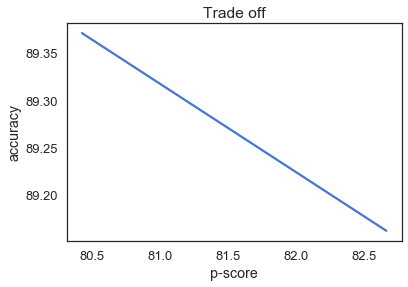

In [25]:
plt.plot(Bacc_Bp_Aacc_Ap_results[:,3], 100*Bacc_Bp_Aacc_Ap_results[:,2])
plt.xlabel('p-score')
plt.ylabel('accuracy')
plt.title('Trade off')

### y_pred distribution curves

In [26]:
result_fname_y_pred_before_after = result_fname + 'Result_y_pred_'+'L' + str(tradeoff_lambda) +'.txt'
#result_fname_y_pred_before_after = './Trade-off-results/'+ result_fname_y_pred_before_after

BA_y_pred = np.loadtxt(result_fname_y_pred_before_after, delimiter=',')

#### Before the de-biaser

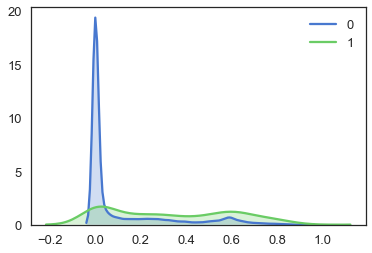

In [27]:
ax = sns.distplot(BA_y_pred[Z_test == 0,0], hist=False, 
                  kde_kws={'shade': True,},
                  label='{}'.format('0'))

ax = sns.distplot(BA_y_pred[Z_test == 1,0], hist=False, 
                  kde_kws={'shade': True,},
                  label='{}'.format('1'))

#### After the de-biaser

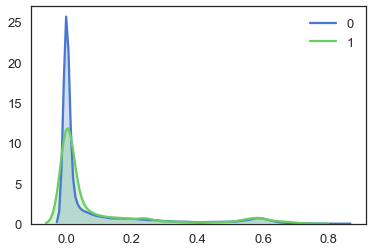

In [28]:
ax = sns.distplot(BA_y_pred[Z_test == 0,1], hist=False, 
                  kde_kws={'shade': True,},
                  label='{}'.format('0'))

ax = sns.distplot(BA_y_pred[Z_test == 1,1], hist=False, 
                  kde_kws={'shade': True,},
                  label='{}'.format('1'))